In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [4]:
df.isna().any().value_counts()

False    170
dtype: int64

In [5]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [6]:
df.drop(['ID','molecule_name','conformation_name'],axis='columns',inplace=True)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [7]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=167)

In [8]:
no_of_features=len(df.columns)-1
no_of_features

166

In [9]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True)

In [10]:
Y=df['class']
X=df.drop(['class'],axis='columns')

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mms=MinMaxScaler()
X[X.columns]=mms.fit_transform(X[X.columns])

In [13]:
X.head()

,index,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.193876,0.458204,0.880952,0.326613,0.163636,0.002257,0.613577,0.506394,0.227523,0.571429,...,0.042289,0.059242,0.688442,0.515244,0.702448,0.849057,0.125000,0.397260,0.525168,0.633652
1,0.948158,0.229102,0.976190,0.794355,0.298182,0.002257,0.603133,0.173913,0.588991,0.122449,...,0.052239,0.289100,0.726131,0.408537,0.478343,0.429245,0.182971,0.380137,0.451342,0.534606
2,0.612854,0.773994,0.003401,0.225806,0.163636,0.002257,0.618799,0.503836,0.223853,0.571429,...,0.049751,0.063981,0.695980,0.030488,0.241055,0.327830,0.367754,0.553082,0.387584,0.787589
3,0.952706,0.204334,0.574830,0.564516,0.887273,0.002257,0.704961,0.667519,0.422018,0.553571,...,0.236318,0.710900,0.437186,0.152439,0.030132,0.377358,0.262681,0.410959,0.442953,0.724344
4,0.608155,0.012384,0.656463,0.846774,0.116364,0.002257,0.415144,0.038363,0.502752,0.035714,...,0.057214,0.571090,0.623116,0.734756,0.382298,0.500000,0.280797,0.782534,0.605705,0.727924


In [14]:
Y.value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [15]:
X

,index,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.193876,0.458204,0.880952,0.326613,0.163636,0.002257,0.613577,0.506394,0.227523,0.571429,...,0.042289,0.059242,0.688442,0.515244,0.702448,0.849057,0.125000,0.397260,0.525168,0.633652
1,0.948158,0.229102,0.976190,0.794355,0.298182,0.002257,0.603133,0.173913,0.588991,0.122449,...,0.052239,0.289100,0.726131,0.408537,0.478343,0.429245,0.182971,0.380137,0.451342,0.534606
2,0.612854,0.773994,0.003401,0.225806,0.163636,0.002257,0.618799,0.503836,0.223853,0.571429,...,0.049751,0.063981,0.695980,0.030488,0.241055,0.327830,0.367754,0.553082,0.387584,0.787589
3,0.952706,0.204334,0.574830,0.564516,0.887273,0.002257,0.704961,0.667519,0.422018,0.553571,...,0.236318,0.710900,0.437186,0.152439,0.030132,0.377358,0.262681,0.410959,0.442953,0.724344
4,0.608155,0.012384,0.656463,0.846774,0.116364,0.002257,0.415144,0.038363,0.502752,0.035714,...,0.057214,0.571090,0.623116,0.734756,0.382298,0.500000,0.280797,0.782534,0.605705,0.727924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0.123541,0.195046,0.360544,0.427419,0.240000,0.002257,0.595300,0.534527,0.113761,0.609694,...,0.042289,0.068720,0.688442,0.222561,0.169492,0.242925,0.150362,0.390411,0.496644,0.630072
6594,0.139154,0.256966,0.241497,0.580645,0.141818,0.002257,0.537859,0.271100,0.559633,0.295918,...,0.007463,0.502370,0.701005,0.378049,0.180791,0.419811,0.179348,0.421233,0.526846,0.706444
6595,0.841443,0.207430,0.527211,0.149194,0.774545,0.002257,0.477807,0.613811,0.376147,0.551020,...,0.146766,0.414692,0.040201,0.326220,0.231638,0.412736,0.231884,0.402397,0.459732,0.702864
6596,0.037896,0.238390,0.000000,0.250000,0.523636,0.004515,0.621410,0.498721,0.225688,0.556122,...,0.201493,0.900474,0.592965,0.545732,0.504708,0.495283,0.166667,0.380137,0.471477,0.602625


In [16]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6593    1
6594    1
6595    0
6596    1
6597    0
Name: class, Length: 6598, dtype: int64

In [17]:
X.shape,Y.shape

((6598, 167), (6598,))

# Building ANN

In [18]:
from tensorflow.keras.layers import Dense,Dropout

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

In [20]:
checkpoint=keras.callbacks.ModelCheckpoint('model_weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
callbacks=[PlotLossesCallback(),checkpoint]

In [21]:
def create_model(X,Y):
    
    model=keras.Sequential([
        Dense(X.shape[1],input_shape=(X.shape[1],),activation='relu'),
        Dropout(0.25),
        Dense(X.shape[1]/2,activation='relu'),
        Dropout(0.25),
        Dense(X.shape[1]/4,activation='relu'),
        Dropout(0.25),
        Dense(X.shape[1]/8,activation='relu'),
        Dropout(0.25),
        Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model


In [22]:
model=create_model(X,Y)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 167)               28056     
_________________________________________________________________
dropout (Dropout)            (None, 167)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 83)                13944     
_________________________________________________________________
dropout_1 (Dropout)          (None, 83)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 41)                3444      
_________________________________________________________________
dropout_2 (Dropout)          (None, 41)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                8

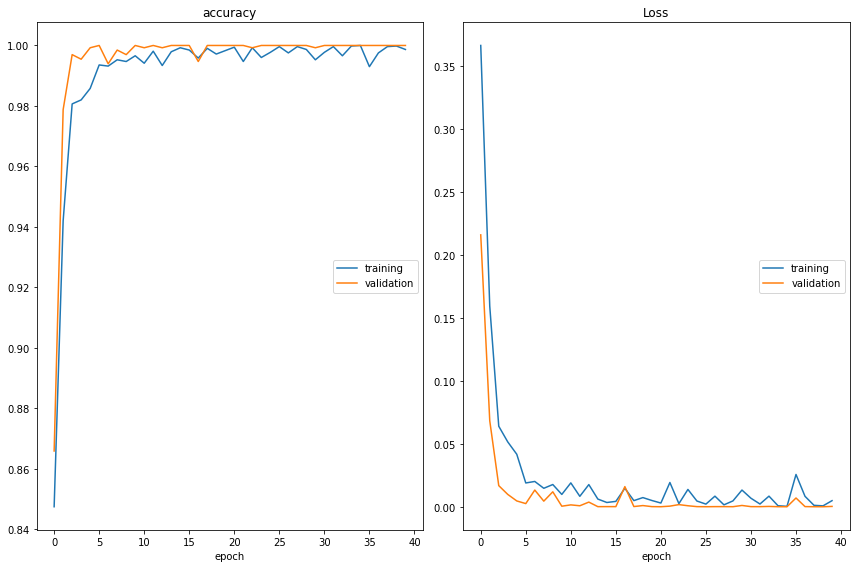

accuracy
	training         	 (min:    0.847, max:    1.000, cur:    0.999)
	validation       	 (min:    0.866, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.366, cur:    0.005)
	validation       	 (min:    0.000, max:    0.216, cur:    0.000)

Epoch 00040: saving model to model_weights.h5
165/165 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 2.6267e-04 - val_accuracy: 1.0000


In [23]:
history=model.fit(X,Y,validation_split=0.2,epochs=40,verbose=1,callbacks=callbacks)

In [24]:
Y_pred=model.predict(X)

In [25]:
for i in range(len(Y_pred)):
    if(Y_pred[i]>=0.5):
        Y_pred[i]=1
    else:
        Y_pred[i]=0
    

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
import seaborn as sns

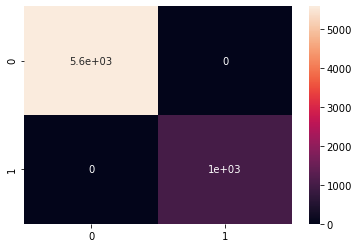

In [28]:
cm=confusion_matrix(Y,Y_pred)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5581
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      6598
   macro avg       1.00      1.00      1.00      6598
weighted avg       1.00      1.00      1.00      6598

